In [111]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
import math
from scipy.stats import norm
import seaborn as sns

In [113]:
# 1a
battery = np.array([25.5, 26.1, 26.8, 23.2, 24.2, 28.4, 25.0, 27.8, 27.3, 25.7])
mean_batt = np.mean(battery)
std_batt = np.std(battery, ddof=1)
n = len(battery)

In [115]:
t_stat, p_val_two = stats.ttest_1samp(battery, 25)
p_val_one = p_val_two / 2 if t_stat > 0 else 1 - p_val_two/2
print(f"sample mean = {mean_batt:.3f}") 
print(f"std = {std_batt:.3f}") 
print(f"n = {n}")
print(f"t = {t_stat:.3f}") 
print(f"one-sided p = {p_val_one:.4f}")

sample mean = 26.000
std = 1.625
n = 10
t = 1.946
one-sided p = 0.0417


In [117]:
print(f" Conclusion that 5% significance level demonstrates population mean is greater than the hypothesized mean.") 

 Conclusion that 5% significance level demonstrates population mean is greater than the hypothesized mean.


In [119]:
alpha = 0.10
t_crit = stats.t.ppf(1 - alpha/2, n - 1)
margin = t_crit * std_batt / np.sqrt(n)
ci_lower, ci_upper = mean_batt - margin, mean_batt + margin
print(f"90% CI for mean:")
print(f"lower: {ci_lower:.3f}")
print(f"upper: {ci_upper:.3f}")

90% CI for mean:
lower: 25.058
upper: 26.942


In [121]:
print(f"Tells me hypothesis confirmed, population mean is larger than 25.")

Tells me hypothesis confirmed, population mean is larger than 25.


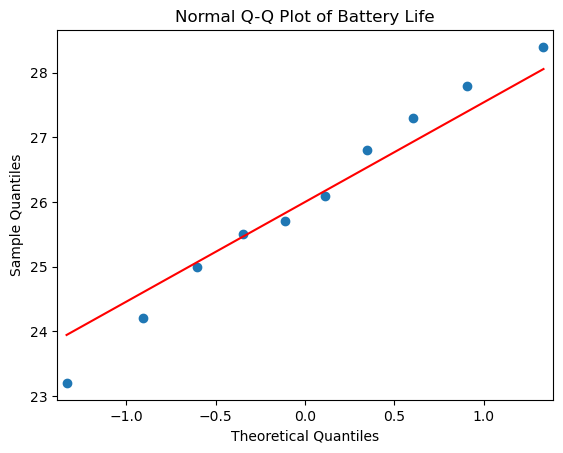

In [123]:
# 1c
sm.qqplot(battery, line='s')
plt.title("Normal Q-Q Plot of Battery Life")
plt.show()

In [125]:
print(f"Conclusion is assumption of normality. Data points along approximately straight line.")

Conclusion is assumption of normality. Data points along approximately straight line.


In [127]:
# 2a 
n = 500              
x = 65              
p_hat = x / n         
p0 = 0.08            
alpha = 0.10         

In [129]:
se0 = math.sqrt(p0 * (1 - p0) / n)

In [131]:
z = (p_hat - p0) / se0
p_value = 2 * (1 - norm.cdf(abs(z))) 

In [133]:
print(f"  z statistic = {z:.3f}")
print(f"  two-sided p-value = {p_value:.5f}")

  z statistic = 4.121
  two-sided p-value = 0.00004


In [135]:
if p_value < alpha:
    print("Reject H0: p ≠ 0.08")
else:
    print("Fail to reject H0: p ≠ 0.08")

Reject H0: p ≠ 0.08


In [137]:
# 2b 
z_95 = norm.ppf(0.95)   # critical value for 95% one-sided
se_hat = math.sqrt(p_hat * (1 - p_hat) / n)
upper_bound = p_hat + z_95 * se_hat

In [139]:
print(f"Upper bound = {upper_bound:.3f}")
print(f"Interpretation is 95% confident that true process fraction nonconforming is no greater than {upper_bound*100:.1f}%.")

Upper bound = 0.155
Interpretation is 95% confident that true process fraction nonconforming is no greater than 15.5%.


In [141]:
# 3
micrometer = np.array([0.150,0.151,0.151,0.152,0.151,0.150,0.151,0.153,0.152,0.151,0.151,0.151])
vernier   = np.array([0.151,0.150,0.151,0.150,0.151,0.151,0.153,0.155,0.154,0.151,0.150,0.152])
diff = micrometer - vernier
t_stat3, p_val3 = stats.ttest_rel(micrometer, vernier)
print(f"There is a mean difference.")
print(f"Mean difference = {np.mean(diff):.6f}")

There is a mean difference.
Mean difference = -0.000417


In [143]:
# 4a
flow = [125,125,125,125,125,125,
        160,160,160,160,160,160,
        200,200,200,200,200,200]

In [145]:
uniformity = [2.7,2.6,4.6,3.2,3.0,3.8,
              4.6,4.9,5.0,4.2,3.6,4.2,
              4.6,2.9,3.4,3.5,4.1,5.1]

In [147]:
df = pd.DataFrame({'Flow': flow, 'Uniformity': uniformity})

In [149]:
model = ols('Uniformity ~ C(Flow)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)

In [151]:
print("\nANOVA Table:")
print(anova_table)


ANOVA Table:
            sum_sq    df         F    PR(>F)
C(Flow)   3.647778   2.0  3.585627  0.053365
Residual  7.630000  15.0       NaN       NaN


In [153]:
alpha = 0.05
p_value = anova_table["PR(>F)"][0]

C:\Users\rober\AppData\Local\Temp\ipykernel_61960\2957397728.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  p_value = anova_table["PR(>F)"][0]


In [155]:
if p_value < alpha:
    print(f"p = {p_value:.4f} < 0.05")
    print(f"Reject H0. Flow rate significantly affects etch uniformity.")
else:
    print(f"p = {p_value:.4f} ≥ 0.05")
    print(f"Fail to reject H0. Flow rate does not significantly affect etch uniformity.")

p = 0.0534 ≥ 0.05
Fail to reject H0. Flow rate does not significantly affect etch uniformity.


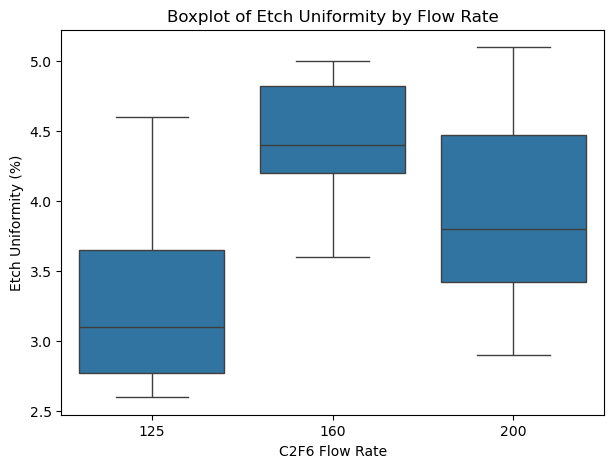

In [157]:
# 4b
plt.figure(figsize=(7,5))
sns.boxplot(x="Flow", y="Uniformity", data=df)
plt.title("Boxplot of Etch Uniformity by Flow Rate")
plt.ylabel("Etch Uniformity (%)")
plt.xlabel("C2F6 Flow Rate")
plt.show()

In [159]:
residuals = model.resid

In [161]:
shapiro_test = stats.shapiro(residuals)
print("\nShapiro-Wilk Test for Normality:")
print(f"W = {shapiro_test.statistic:.4f}, p = {shapiro_test.pvalue:.4f}")
print(f"p = {shapiro_test.pvalue:.4f}")


Shapiro-Wilk Test for Normality:
W = 0.9605, p = 0.6111
p = 0.6111


In [163]:
if shapiro_test.pvalue > 0.05:
    print("  Conclusion: Fail to reject H0: Normality assumption seems reasonable.")
else:
    print("  Conclusion: Reject H0: Non-normality in residuals.")

  Conclusion: Fail to reject H0: Normality assumption seems reasonable.


In [165]:
# 5a
strength = np.array([160,171,175,182,184,181,188,193,195,200])
pct_hardwood = np.array([10,15,15,20,20,20,25,25,28,30])

In [167]:
data = pd.DataFrame({
    "Strength": strength,
    "PctHardwood": pct_hardwood
})

In [169]:
print(data)
print("\n")

   Strength  PctHardwood
0       160           10
1       171           15
2       175           15
3       182           20
4       184           20
5       181           20
6       188           25
7       193           25
8       195           28
9       200           30




In [171]:
X = sm.add_constant(pct_hardwood)  
model = sm.OLS(strength, X).fit()
print(model.summary())
print("\n")

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.970
Model:                            OLS   Adj. R-squared:                  0.966
Method:                 Least Squares   F-statistic:                     260.0
Date:                Thu, 25 Sep 2025   Prob (F-statistic):           2.20e-07
Time:                        00:04:35   Log-Likelihood:                -20.973
No. Observations:                  10   AIC:                             45.95
Df Residuals:                       8   BIC:                             46.55
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        143.8244      2.522     57.039      0.0

C:\Users\rober\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


In [173]:
# 5b
p_value = model.pvalues[1]  
print(f"p-value for slope (PctHardwood): {p_value:.4f}")
if p_value < 0.05:
    print("Result: Reject H0. The slope is significant.")
else:
    print("Result: Fail to reject H0. No significant relationship detected.")
print("\n")

p-value for slope (PctHardwood): 0.0000
Result: Reject H0. The slope is significant.




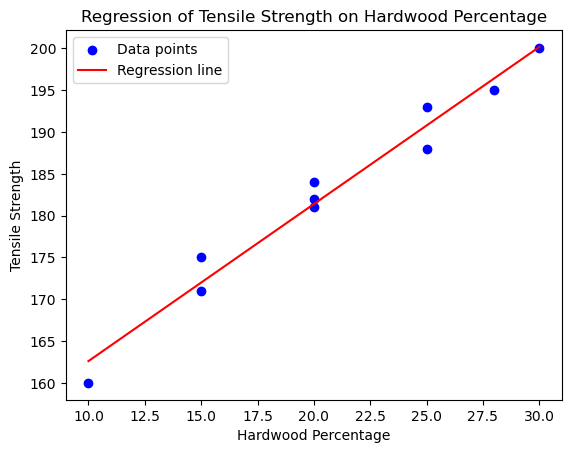

In [175]:
# 5c
plt.scatter(pct_hardwood, strength, color="blue", label="Data points")
plt.plot(pct_hardwood, model.predict(X), color="red", label="Regression line")
plt.xlabel("Hardwood Percentage")
plt.ylabel("Tensile Strength")
plt.title("Regression of Tensile Strength on Hardwood Percentage")
plt.legend()
plt.show()

In [177]:
# 5d
print(f"R-squared: {model.rsquared:.3f}")
print(f"Estimated regression equation: Strength = {model.params[0]:.2f} + {model.params[1]:.2f} * PctHardwood")

if p_value < 0.05:
    print("There is a statistically significant positive relationship between hardwood percentage and strength.")
    print("The plot shows that as hardwood % increases, tensile strength tends to increase practically linearly.")
else:
    print("No significant relationship between hardwood % and tensile strength was detected.")    

R-squared: 0.970
Estimated regression equation: Strength = 143.82 + 1.88 * PctHardwood
There is a statistically significant positive relationship between hardwood percentage and strength.
The plot shows that as hardwood % increases, tensile strength tends to increase practically linearly.
